In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 1 z przedmiotu Ekonometrii Przestrzennej

W projekcie przeanalizowano autokorelację przestrzenną przestępczości na poziomie województw, wykorzystując dane  z Głównego Urzędu Statystycznego (GUS) obejmujące liczbę przestępstw stwierdzonych przez Policję w zakończonych postępowaniach przygotowawczych i liczbę ludności w 2020 roku. Obliczono wskaźniki przestępczości na mieszkańca, aby umożliwić porównanie między regionami. W badaniu wykorzystano globalne miary autokorelacji przestrzennej, takie jak  statystyka 𝐼  Morana, statystyka 𝐶 Geary’ego oraz statystyka 𝐺 Getisa i Orda oraz używając dwóch rodzajów macierzy wag: macierzy sąsiedztwa oraz macierzy KNN (bazującej na najbliższych sąsiadach).

In [3]:
woj = pd.read_csv("przestepstwa.csv")
woj_map = "wojewodztwa.shp"
woj_m = gpd.read_file(woj_map)
ludnosc_woj = pd.read_csv("powierzchnia_i_ludnosc.csv")

In [4]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [5]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem': 'Przestępstwa'
}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [6]:
woj.describe()

,Przestępstwa
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [7]:
woj.dtypes

JPT_NAZWA_       object
Przestępstwa    float64
dtype: object

In [8]:
ludnosc_woj

,JPT_NAZWA_,Ludność
0,dolnośląskie,2900163
1,kujawsko-pomorskie,2072373
2,lubelskie,2108270
3,lubuskie,1011592
4,łódzkie,2454779
5,małopolskie,3410901
6,mazowieckie,5423168
7,opolskie,982626
8,podkarpackie,2127164
9,podlaskie,1178353


In [9]:
merged_df = woj.merge(ludnosc_woj, on='JPT_NAZWA_')

In [10]:
merged_df['Przestępstwa_średnia'] = (merged_df['Przestępstwa'] / merged_df['Ludność']) 

In [11]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa', 'Ludność', 'Przestępstwa_średnia']])

             JPT_NAZWA_  Przestępstwa  Ludność  Przestępstwa_średnia
0           małopolskie       69174.0  3410901              0.020280
1               śląskie      117632.0  4517635              0.026038
2              lubuskie       24531.0  1011592              0.024250
3         wielkopolskie       58900.0  3498733              0.016835
4    zachodniopomorskie       35325.0  1696193              0.020826
5          dolnośląskie       74802.0  2900163              0.025792
6              opolskie       15710.0   982626              0.015988
7    kujawsko-pomorskie       37172.0  2072373              0.017937
8             pomorskie       49381.0  2343928              0.021068
9   warmińsko-mazurskie       26295.0  1422737              0.018482
10              łódzkie       44680.0  2454779              0.018201
11       świętokrzyskie       22683.0  1233961              0.018382
12            lubelskie       29057.0  2108270              0.013782
13         podkarpackie       3221

In [12]:
woj = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia']]
print(woj)

             JPT_NAZWA_  Przestępstwa_średnia
0           małopolskie              0.020280
1               śląskie              0.026038
2              lubuskie              0.024250
3         wielkopolskie              0.016835
4    zachodniopomorskie              0.020826
5          dolnośląskie              0.025792
6              opolskie              0.015988
7    kujawsko-pomorskie              0.017937
8             pomorskie              0.021068
9   warmińsko-mazurskie              0.018482
10              łódzkie              0.018201
11       świętokrzyskie              0.018382
12            lubelskie              0.013782
13         podkarpackie              0.015144
14            podlaskie              0.014929
15          mazowieckie              0.020331


In [13]:
print(woj.sort_values(by='Przestępstwa_średnia', ascending=False))


             JPT_NAZWA_  Przestępstwa_średnia
1               śląskie              0.026038
5          dolnośląskie              0.025792
2              lubuskie              0.024250
8             pomorskie              0.021068
4    zachodniopomorskie              0.020826
15          mazowieckie              0.020331
0           małopolskie              0.020280
9   warmińsko-mazurskie              0.018482
11       świętokrzyskie              0.018382
10              łódzkie              0.018201
7    kujawsko-pomorskie              0.017937
3         wielkopolskie              0.016835
6              opolskie              0.015988
13         podkarpackie              0.015144
14            podlaskie              0.014929
12            lubelskie              0.013782


<Axes: >

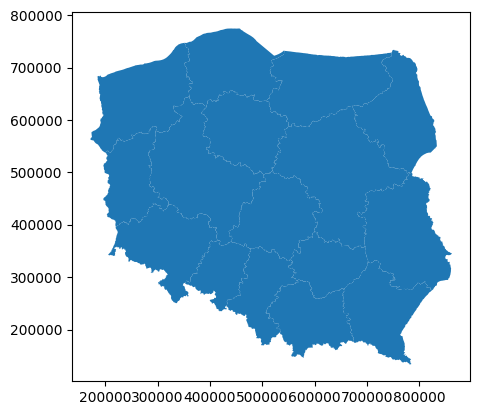

In [14]:
woj_m.plot(legend=True)

In [15]:
woj_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,1364544,0,None,0,0,12.1323542862,3.10794349875,81168387600000,wojewodztwo,"POLYGON ((188256.168 683730.875, 189761.898 68..."
1,None,WOJ,1398751,08,lubuskie,None,0,20211210,0,20120926,...,1361674,0,None,0,0,11.0914310011,1.83850176383,97789593100000,wojewodztwo,"POLYGON ((249058.528 411232.826, 249030.522 41..."
2,None,WOJ,1994777,02,dolnośląskie,None,0,20221019,0,20120926,...,1365817,0,None,0,0,13.846094171,2.55916927233,93193464400000,wojewodztwo,"POLYGON ((351910.997 289041.305, 351818.002 28..."
3,None,WOJ,2982700,30,wielkopolskie,None,0,20220330,0,20120926,...,1363546,2982700,None,0,0,18.4097920287,3.93220020515,63125781600000,wojewodztwo,"POLYGON ((441690.785 515930.957, 441724.727 51..."
4,None,WOJ,1831001,22,pomorskie,None,0,20220906,0,20120926,...,1365552,0,None,0,0,11.7084107024,2.68945114136,19167483600000,wojewodztwo,"POLYGON ((488665.467 751328.589, 488780.891 75..."


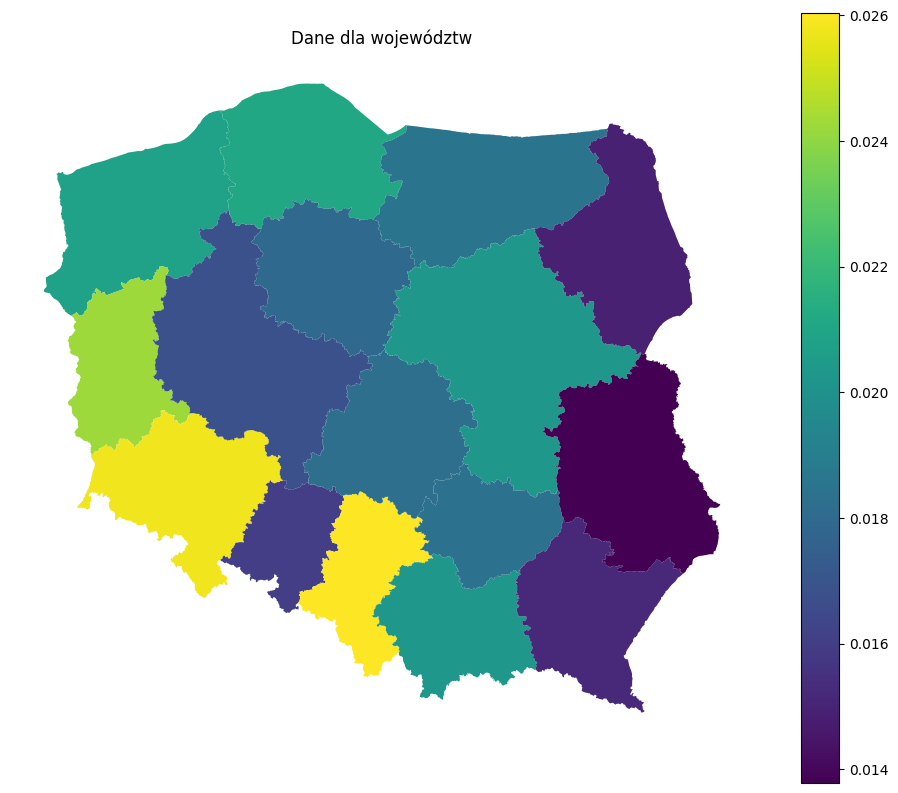

In [16]:
merged_woj = woj_m.merge(woj, on='JPT_NAZWA_')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_woj.plot(column='Przestępstwa_średnia',
               ax=ax,
               legend=True)
ax.set_axis_off()
plt.title('Dane dla województw')
plt.show()

Mapa przedstawia wskaźniki przestępczości na mieszkańca w poszczególnych województwach Polski w 2020 roku. Najwyższe wskaźniki zanotowano w województwach śląskim (0,0260 przestępstw na mieszkańca, populacja: 4 517 635), dolnośląskim (0,0258 przestępstw na mieszkańca, populacja: 2 900 163) i lubuskim (0,0243 przestępstw na mieszkańca, populacja: 1 011 592). Z kolei najniższe wskaźniki odnotowano w podkarpackim (0,0151 przestępstw na mieszkańca, populacja: 2 127 164), podlaskim (0,0149 przestępstw na mieszkańca, populacja: 1 178 353) i lubelskim (0,0138 przestępstw na mieszkańca, populacja: 2 108 270). Kolor żółty oznacza wyższy poziom przestępczości, natomiast ciemny fiolet oznacza niższy.

In [17]:
import numpy as np
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights

In [18]:
data_column = 'Przestępstwa_średnia'

w = weights.Queen.from_dataframe(merged_woj)
w.transform = 'r'

C:\Users\xjulc\AppData\Local\Temp\ipykernel_45584\3448626889.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_woj)


In [19]:
y = merged_woj[data_column]
moran_woj = Moran(y, w)
print("Moran's I:", moran_woj.I)
print("p-value:", moran_woj.p_sim)

Moran's I: 0.07664418431286983
p-value: 0.178


In [20]:
geary_woj = Geary(y, w)
print("Geary's C:", geary_woj.C)
print("p-value:", geary_woj.p_sim)

Geary's C: 0.8048204714759354
p-value: 0.096


In [21]:
g_woj = G(y, w)
print("Global Getis-Ord G:", g_woj.G)
print("p-value", g_woj.p_sim)

Global Getis-Ord G: 0.2773290388481809
p-value 0.254


In [22]:
g_local_woj = G_Local(y, w)
print("Local G* values:", g_local_woj.Zs)

Local G* values: [ 0.42016993  0.63726732  0.05847825  0.31404855 -0.16972587  0.61652451
 -0.10034932 -0.18497409 -0.02311043  0.17660381 -0.20246589 -0.60424537
 -0.0975971  -0.57902238 -0.57185087 -0.71126571]


In [23]:
from splot.esda import moran_scatterplot

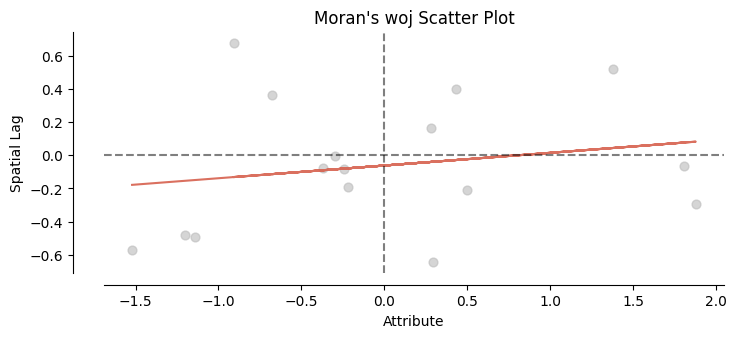

In [24]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_woj, ax=ax)
ax.set_title("Moran's woj Scatter Plot")
plt.show()

In [25]:
import seaborn as sns

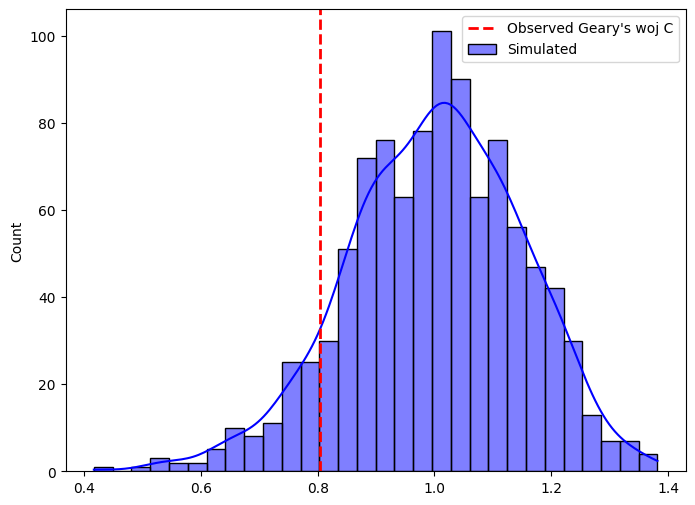

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_woj.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_woj.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's woj C")
plt.legend()
plt.show()

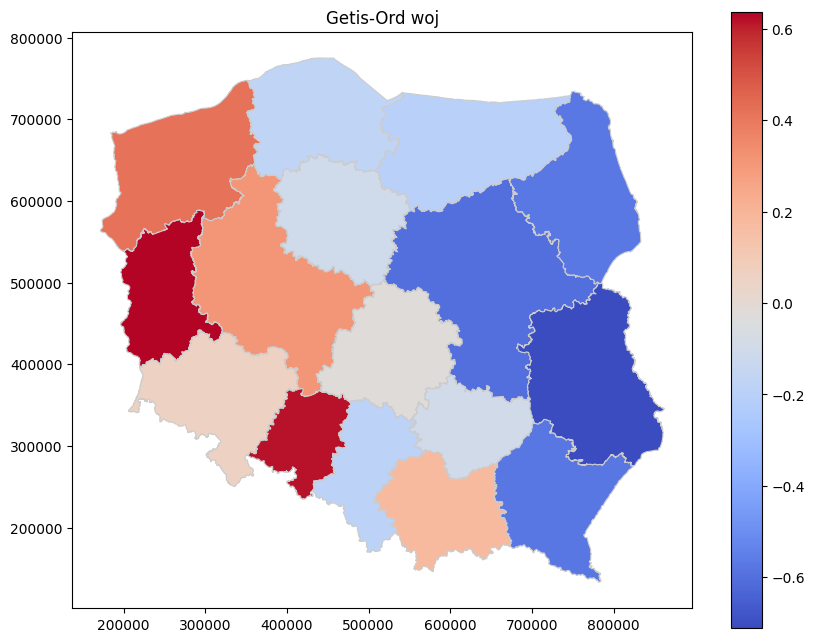

In [27]:
merged_woj['GetisOrd_G_Z'] = g_local_woj.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_woj.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord woj")
plt.show()

In [28]:
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

In [29]:
data_column = 'Przestępstwa_średnia'

w_knn = KNN.from_dataframe(merged_woj)

In [30]:
y_knn = merged_woj[data_column]
moran_woj_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_woj_knn.I)
print("p-value:", moran_woj_knn.p_sim)

Moran's I: 0.009323089163557455
p-value: 0.368


In [31]:
geary_woj_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_woj_knn.C)
print("p-value:", geary_woj_knn.p_sim)

Geary's C: 0.8705614667314351
p-value: 0.295


In [32]:
g_woj_knn = G(y_knn, w_knn)
print("Global Getis-Ord G:", g_woj_knn.G)
print("p-value", g_woj_knn.p_sim)

Global Getis-Ord G: 0.13793957161712952
p-value 0.077


In [33]:
g_local_woj_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_woj_knn.Zs)

Local G* values: [ 0.94484016  0.68398182  0.39103965  0.45400249  0.06361632  1.77660226
 -0.10904018 -0.20919316  0.00514233  0.81086404 -0.45423978 -0.70850596
 -0.02283816 -0.05909425 -0.04214971 -0.83788044]


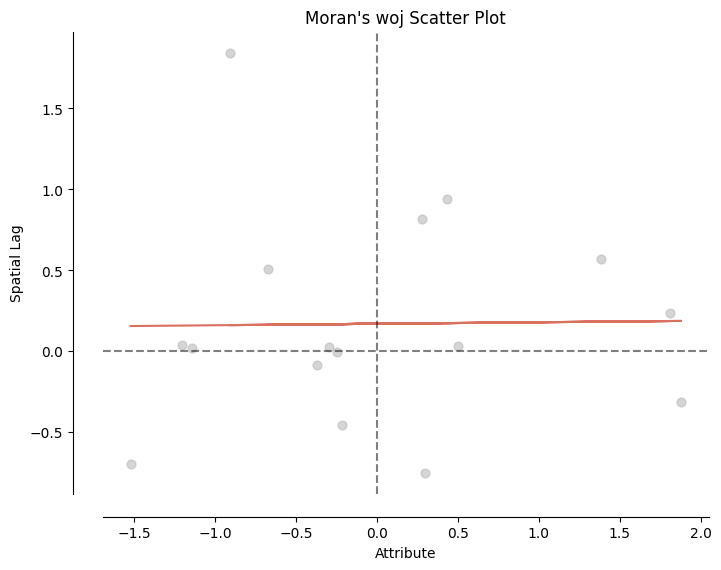

In [34]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_woj_knn, ax=ax)
ax.set_title("Moran's woj Scatter Plot")
plt.show()

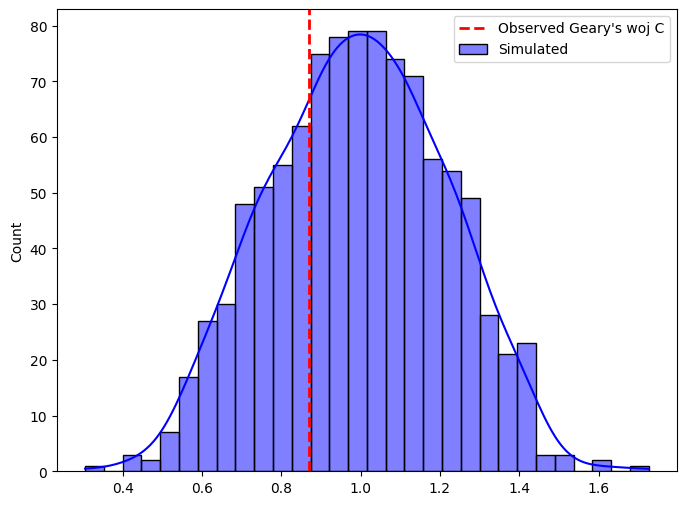

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_woj_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_woj_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's woj C")
plt.legend()
plt.show()

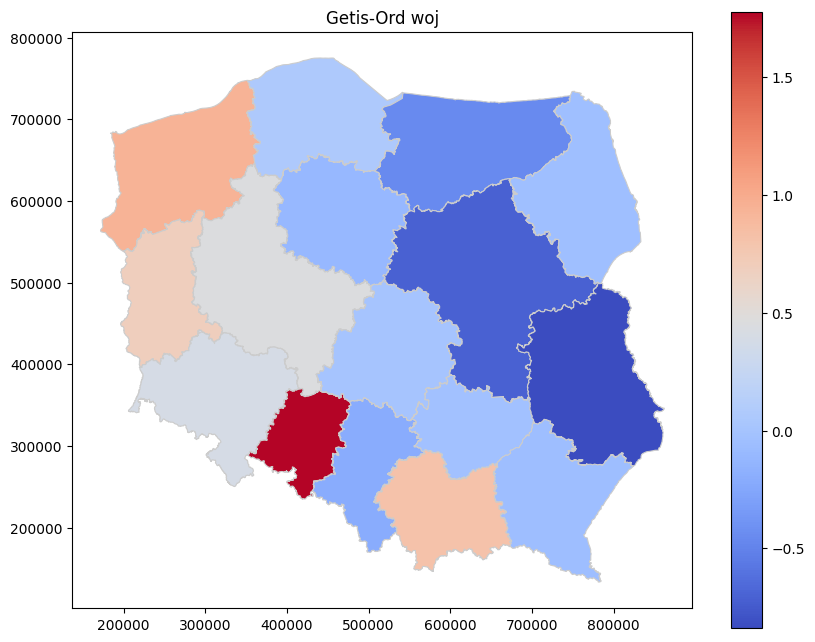

In [36]:
merged_woj['GetisOrd_G_Z'] = g_local_woj_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_woj.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord woj")
plt.show()

In [37]:
from esda.moran import Moran
from pysal.lib import weights


y = merged_woj[data_column]
w = weights.KNN.from_dataframe(merged_woj, k=5)  # przykładowa macierz sąsiedztwa

# Tworzymy statystykę Morana z określoną liczbą permutacji (np. 999)
moran_woj = Moran(y, w, permutations=999)

# Wyświetlamy wyniki
print("Moran's I:", moran_woj.I)
print("p-value:", moran_woj.p_sim)

Moran's I: 0.06918611044666718
p-value: 0.126
